In [1]:
import pandas as pd
import tensorflow
from tensorflow.keras.utils import to_categorical , plot_model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , AveragePooling2D , Flatten , Dense , Dropout , Activation , Concatenate , BatchNormalization , Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras import activations
import pickle

%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [90]:
df_train = pd.read_pickle('/gdrive/MyDrive/Proj2_data/data1/train.pickle')
df_valid = pd.read_pickle('/gdrive/MyDrive/Proj2_data/data1/valid.pickle')
df_test = pd.read_pickle('/gdrive/MyDrive/Proj2_data/data1/test.pickle')
labelnames = pd.read_csv('/gdrive/MyDrive/Proj2_data/data1/label_names.csv')
print('read files done')

read files done


In [91]:
trainx = df_train['features']
trainy = df_train['labels']
validx = df_valid['features']
validy = df_valid['labels']
testx = df_test['features']
testy = df_test['labels']
temptrainx = df_train['features']
temptrainy = df_train['labels']
print('data sprated')

data sprated


In [34]:
print('Train: X=%s , Y=%s'%(trainx.shape , trainy.shape))
print('Valid: X=%s , Y=%s'%(validx.shape , validy.shape))
print('Test: X=%s , Y=%s'%(testx.shape , testy.shape))

Train: X=(34799, 32, 32, 3) , Y=(34799,)
Valid: X=(4410, 32, 32, 3) , Y=(4410,)
Test: X=(12630, 32, 32, 3) , Y=(12630,)


In [92]:
trainy = to_categorical(trainy)
validy = to_categorical(validy)
testy = to_categorical(testy)
print('one hot encoding done')

one hot encoding done


In [93]:
trainx = trainx.astype('float32')
validx = validx.astype('float32')
testx = testx.astype('float32')
trainx = trainx/255.0
validx = validx/255.0
testx = testx/255.0
print('data types to float and into[0,1]')

data types to float and into[0,1]


In [94]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10 ,
    zoom_range = 0.1 ,
    width_shift_range = 0.1 ,
    height_shift_range = 0.1 ,
    horizontal_flip =False ,
    vertical_flip = False
)
print('imagedatagenerator defined')

imagedatagenerator defined


In [38]:
imagedata = datagen.flow(trainx , y = trainy , batch_size=128)
for i, (images,labels) in enumerate(imagedata):
  print(i)
  if i==0 :
    print(images.shape)
    break

0
(128, 32, 32, 3)


In [11]:
datagentest = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15 ,
    zoom_range = 0.4 ,
    width_shift_range = 0.3 ,
    height_shift_range = 0.1 ,
    horizontal_flip =False ,
    vertical_flip = False
)
print('imagedatagenerator defined for test')

imagedatagenerator defined for test


0
(1, 32, 32, 3)
(32, 32, 3)
(32, 32, 3)


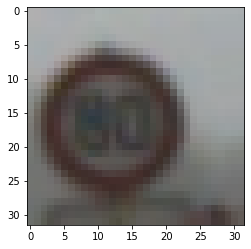

In [12]:
imagedata = datagentest.flow(trainx,batch_size=1)
for i,(images) in enumerate(imagedata):
  print(i)
  if i==0:
    print(images.shape)
    img = images[0]
    print(img.shape)
    img = img.reshape(32,32,3)
    print(img.shape)
    plt.imshow(img)
    break

0
(1, 32, 32, 3)
(32, 32, 3)
(32, 32, 3)
label : [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


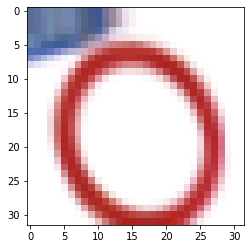

In [13]:
imagedata = datagen.flow(trainx,y = trainy,batch_size=1)
for i,(images,labels) in enumerate(imagedata):
  print(i)
  if i==0:
    print(images.shape)
    img = images[0]
    print(img.shape)
    img = img.reshape(32,32,3)
    print(img.shape)
    plt.imshow(img)
    print('label : {}'.format(labels))
    break

In [95]:
batch_size = 256
trianingdata = datagen.flow(trainx,y=trainy,batch_size=batch_size)
validdata = datagen.flow(validx,y=validy,batch_size=batch_size)
testdata = datagen.flow(testx , y = testy , batch_size = batch_size)
print('data ready for cnn')

data ready for cnn


In [96]:
es = EarlyStopping(monitor='val_loss',mode='auto',verbose=1,patience=1)
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5",monitor='val_accuracy',verbose=1,save_best_only=True)

print('earlystopping , checkpointer defined')

earlystopping , checkpointer defined


In [97]:
inputmodel=Input((trainx.shape[1],trainx.shape[2],trainx.shape[3]),name='input_layer')

model1=Conv2D(32,(5,5),activation='relu',name='Conv1_5')(inputmodel)
model1=BatchNormalization(name='Bnorml')(model1)
model1=Conv2D(32,(5,5),activation='relu',padding='same',name='Conv2_5')(model1)
model1=BatchNormalization(name='Bnorm2')(model1)
model1=MaxPooling2D((2,2),name='Maxpool1')(model1)
model1=Conv2D(64,(3,3),activation='relu',padding='same',name='Conv3_3')(model1)
model1=BatchNormalization(name='Bnorm3')(model1)
model1=Conv2D(64,(3,3),activation='relu',padding='same',name='Conv4_3')(model1)
model1=BatchNormalization(name='Bnorm4')(model1)
model1=AveragePooling2D((2,2),name='Avgpool1')(model1)
model1=Conv2D(128,(1,1),activation='relu',padding='valid',name='Conv5_1')(model1)
model1=BatchNormalization(name='Bnorm5')(model1)

model1=Flatten(name='Flatten')(model1)

model1=Dense(units=32,activation='relu')(model1)
model=Dropout(rate=0.2)(model1)
model1=BatchNormalization()(model1)
model1=Dense(units=20,activation='relu')(model1)
model1=BatchNormalization()(model1)
model1=Dense(units=15,activation='relu')(model1)
model1=BatchNormalization()(model1)
output=Dense(units=43,activation='softmax',name='preds')(model1)

model = Model(inputs = [inputmodel],outputs=[output])
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv1_5 (Conv2D)             (None, 28, 28, 32)        2432      
_________________________________________________________________
Bnorml (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
Conv2_5 (Conv2D)             (None, 28, 28, 32)        25632     
_________________________________________________________________
Bnorm2 (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
Maxpool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
Conv3_3 (Conv2D)             (None, 14, 14, 64)      

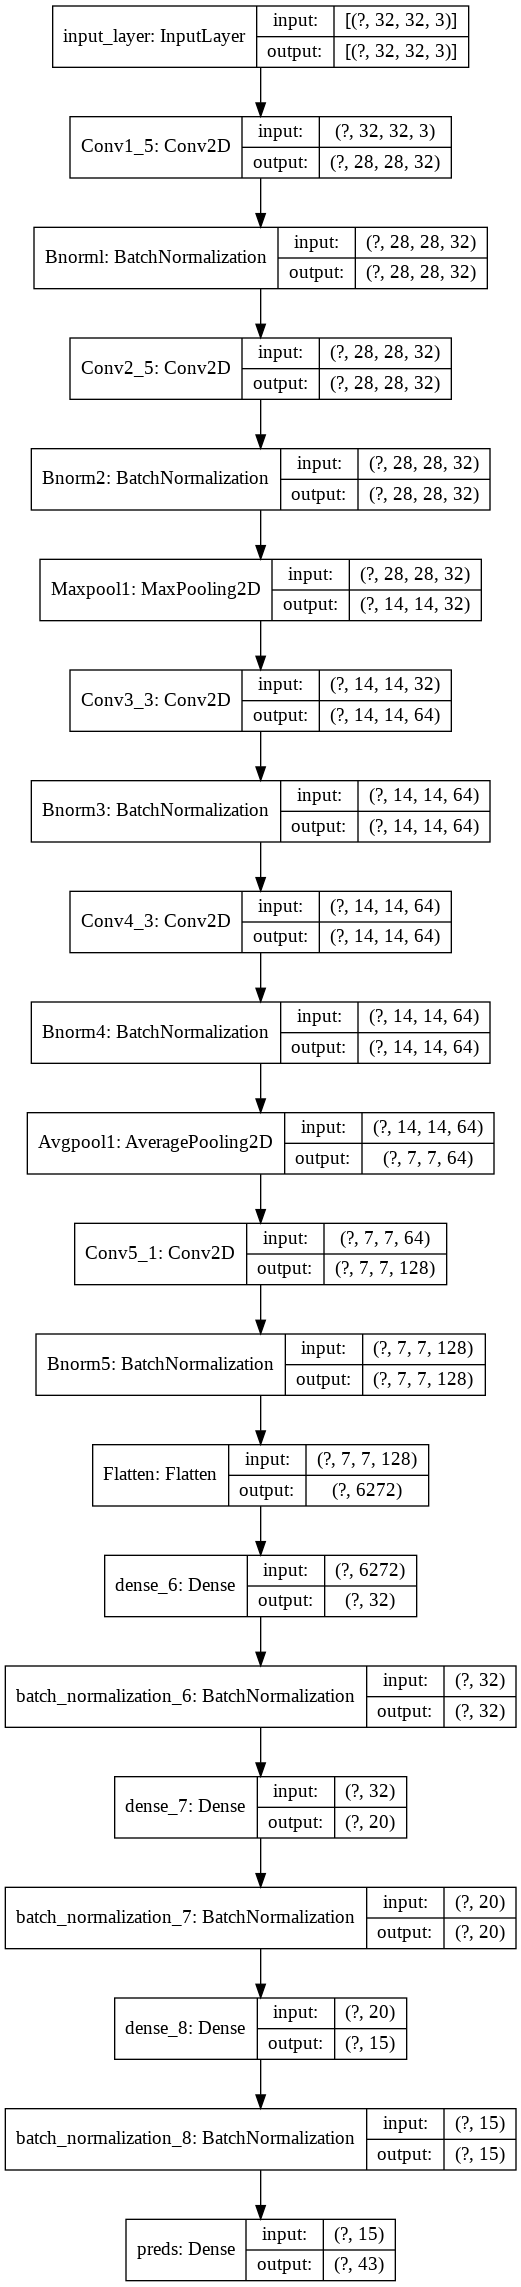

In [57]:
plot_model(model,show_shapes=True)

In [18]:
layer_names = []
for layer in model.layers[1:14]:
  layer_names.append(layer.name)
layer_names  

['Conv1_5',
 'Bnorml',
 'Conv2_5',
 'Bnorm2',
 'Maxpool1',
 'Conv3_3',
 'Bnorm3',
 'Conv4_3',
 'Bnorm4',
 'Avgpool1',
 'Conv5_1',
 'Bnorm5',
 'Flatten']

In [98]:
sgd = SGD(learning_rate=0.005,momentum=0.9)
model.compile(optimizer=sgd , loss='categorical_crossentropy',metrics=['accuracy'])
print('optimizer defined')

optimizer defined


In [99]:
history = model.fit_generator(trianingdata,
                              epochs=15,
                              validation_data = validdata,
                              verbose=1,
                              callbacks=[es,checkpointer,lrr])

Epoch 1/15
136/136 [==============================] - ETA: 0s - loss: 3.0476 - accuracy: 0.2529
Epoch 00001: val_accuracy improved from -inf to 0.09025, saving model to best_weights.hdf5
136/136 [==============================] - 16s 120ms/step - loss: 3.0476 - accuracy: 0.2529 - val_loss: 3.5155 - val_accuracy: 0.0902
Epoch 2/15
136/136 [==============================] - ETA: 0s - loss: 1.8512 - accuracy: 0.5181
Epoch 00002: val_accuracy improved from 0.09025 to 0.25986, saving model to best_weights.hdf5
136/136 [==============================] - 16s 119ms/step - loss: 1.8512 - accuracy: 0.5181 - val_loss: 2.8569 - val_accuracy: 0.2599
Epoch 3/15
136/136 [==============================] - ETA: 0s - loss: 1.1031 - accuracy: 0.7164
Epoch 00003: val_accuracy improved from 0.25986 to 0.59887, saving model to best_weights.hdf5
136/136 [==============================] - 16s 119ms/step - loss: 1.1031 - accuracy: 0.7164 - val_loss: 1.5032 - val_accuracy: 0.5989
Epoch 4/15
136/136 [===========

In [100]:
model.save_weights("/gdrive/My Drive/weights5.h5")
print('model saved')

model saved


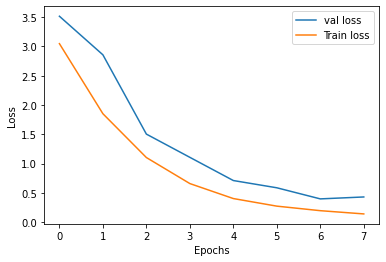

In [101]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['val loss','Train loss'],loc = 'upper right')
plt.savefig('plot_loss.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper righr'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


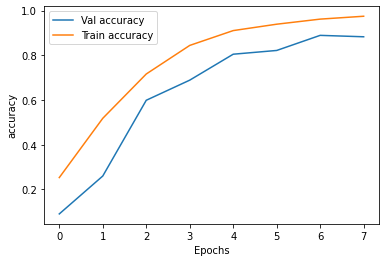

In [102]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'],loc='upper righr')
plt.savefig('plot_accuracy.png')
plt.show()

In [117]:
predicty = model2.predict(testx)
predicty = np.argmax(predicty,axis=1)
temptesty = df_test['labels']
falsenumber = 0
for i in range(len(predicty)):
  if(predicty[i] == temptesty[i]):
    print('for ' + str(i+1) + ' predict is true')
  else:
    print('for ' + str(i+1) + ' predict is false')
    falsenumber += 1
print (str(falsenumber) + ' prediction was false')

ValueError: ignored

In [105]:
labelsnumber=[]
for i in range(43):
    labelsnumber.append(0)
    for j in range(len(temptrainy)):
        if(i == temptrainy[j]):
            labelsnumber[i] = labelsnumber[i] + 1
for i in range(43):
    print(labelsnumber[i])
print("Min is :",min(labelsnumber))
print("Max is  :",max(labelsnumber))
print('Classes are not balanced')

180
1980
2010
1260
1770
1650
360
1290
1260
1320
1800
1170
1890
1920
690
540
360
990
1080
180
300
270
330
450
240
1350
540
210
480
240
390
690
210
599
360
1080
330
180
1860
270
300
210
210
Min is : 180
Max is  : 2010
Classes are not balanced


In [106]:
var = np.var(labelsnumber)
phi = np.sqrt(var)
print(phi)
median = np.median(labelsnumber)
print(median)

619.4201837045108
540.0


In [ ]:
traind = {}
for i in range(len(labelnames)):
    traind[str(i)] = []

for index, img in enumerate(temptrainx):
    traind[str(temptrainy[index])].append(img)

In [ ]:
for name , images in traind.items():
    l = len(images)
    l1 = l
    while l1<median:
        traind[name] = np.concatenate((traind[name], images), axis=0)
        l1+=l
    np.random.shuffle(traind[name])
    traind[name] = np.array(traind[name][:540])
for name, images in traind.items():
    print('Traffic sign', name, ' has ', len(images), 'images that shape is', images.shape)

print('now all classes are balanced')

Traffic sign 0  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 1  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 2  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 3  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 4  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 5  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 6  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 7  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 8  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 9  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 10  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 11  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 12  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 13  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 14  has  540 images that shape is (540, 32, 32, 3)
Traffic sign 15  has  540 images that shape is (54

layer: Conv1_5 , feature map shape : (1, 28, 28, 32)
nrow : 4 , ncol : 8


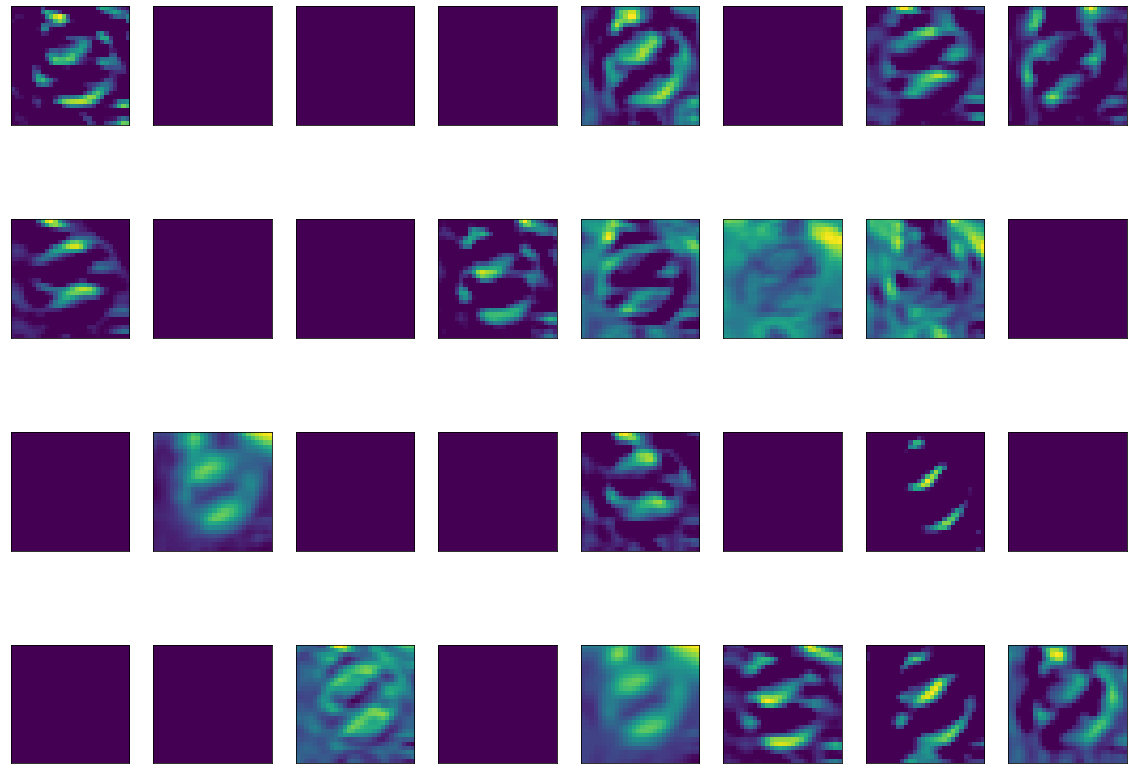

layer: Bnorml , feature map shape : (1, 28, 28, 32)
nrow : 4 , ncol : 8


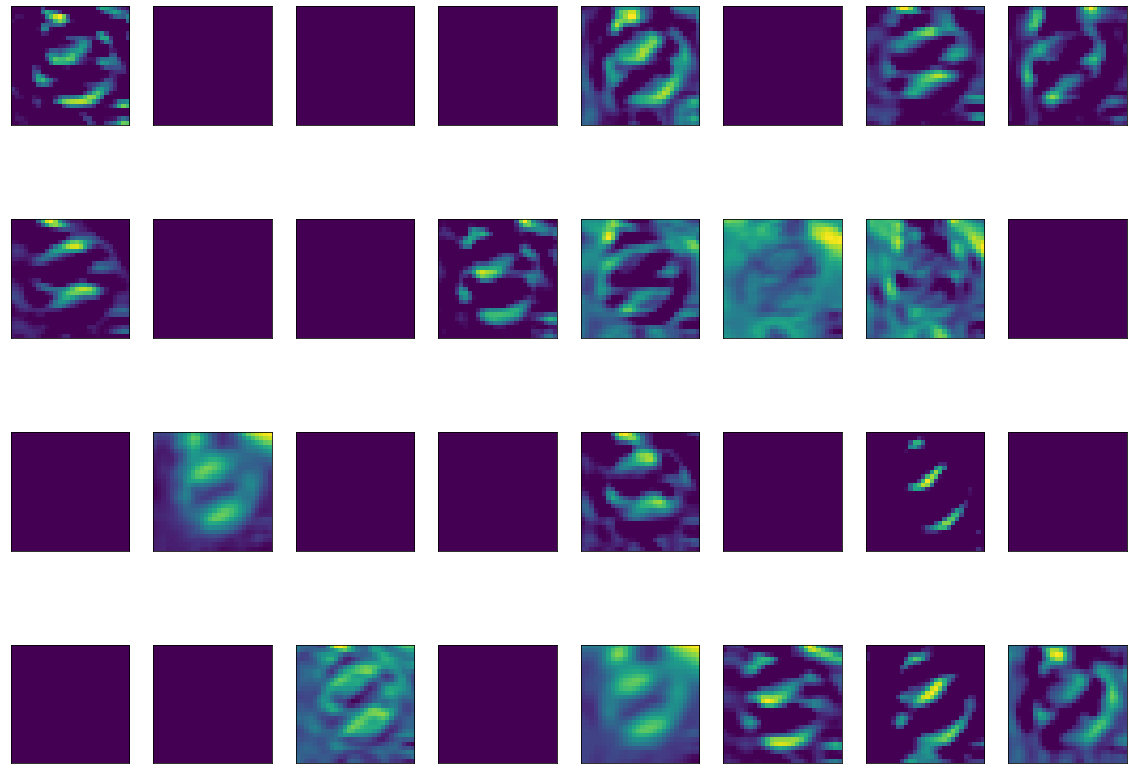

layer: Conv2_5 , feature map shape : (1, 28, 28, 32)
nrow : 4 , ncol : 8


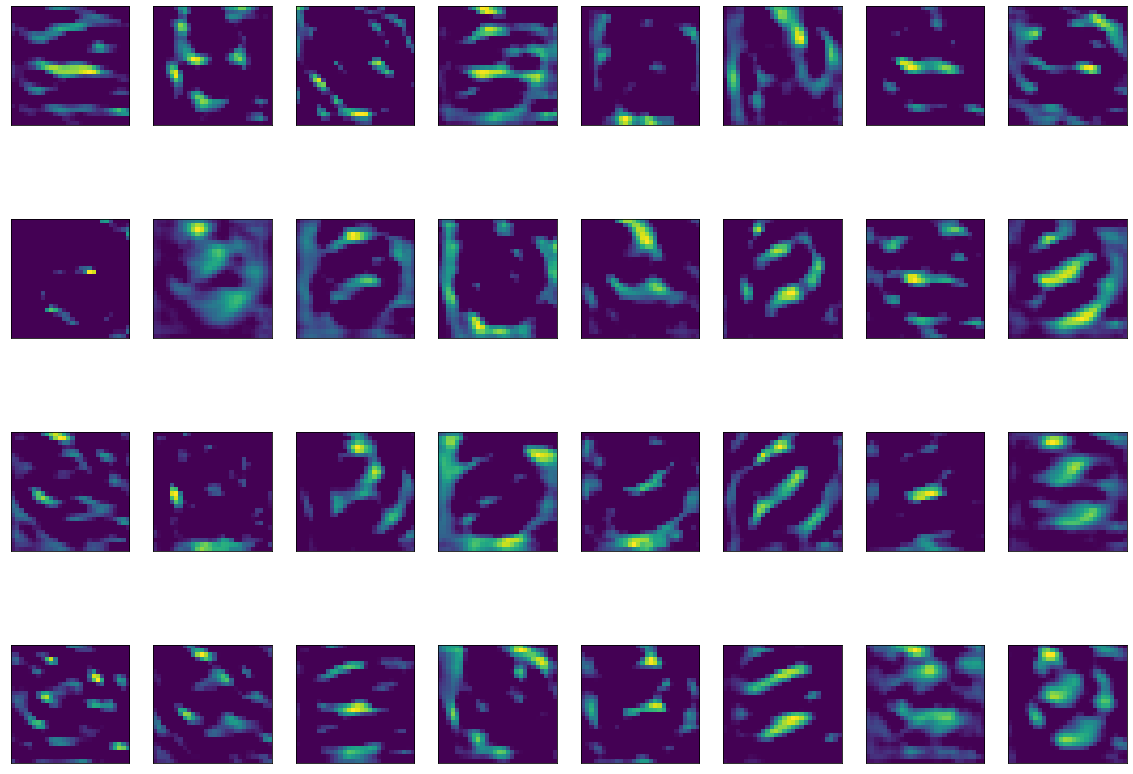

layer: Bnorm2 , feature map shape : (1, 28, 28, 32)
nrow : 4 , ncol : 8


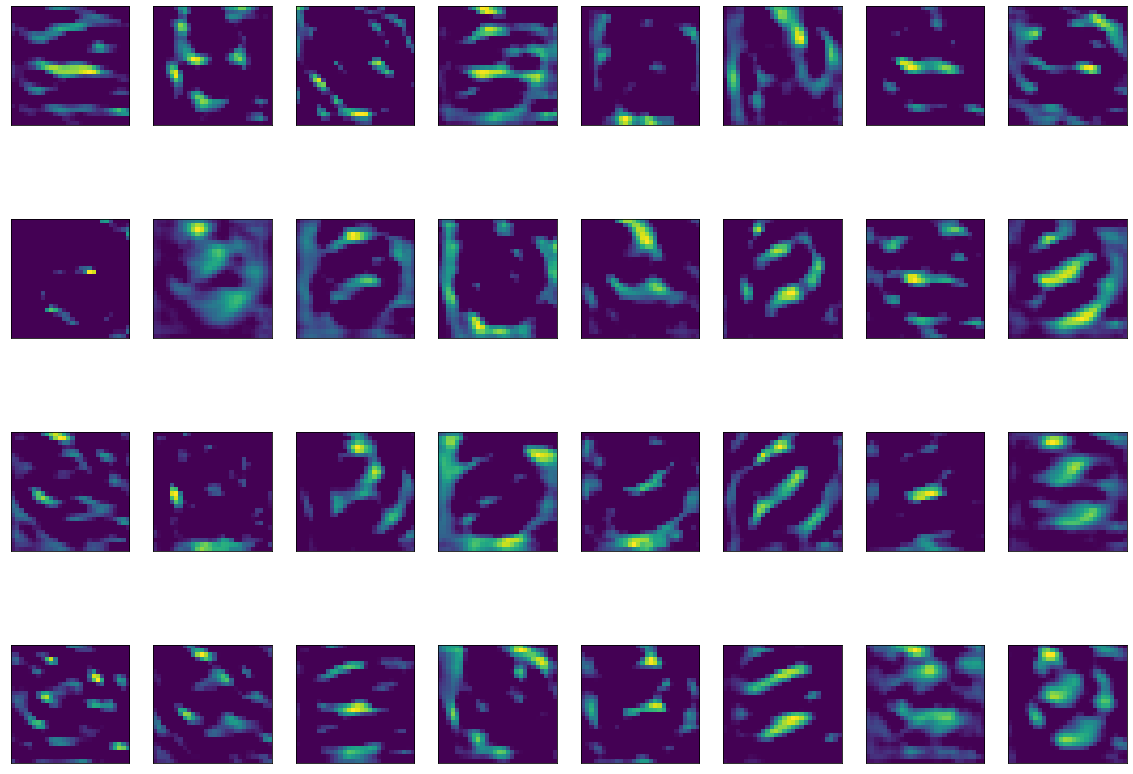

layer: Maxpool1 , feature map shape : (1, 14, 14, 32)
nrow : 4 , ncol : 8


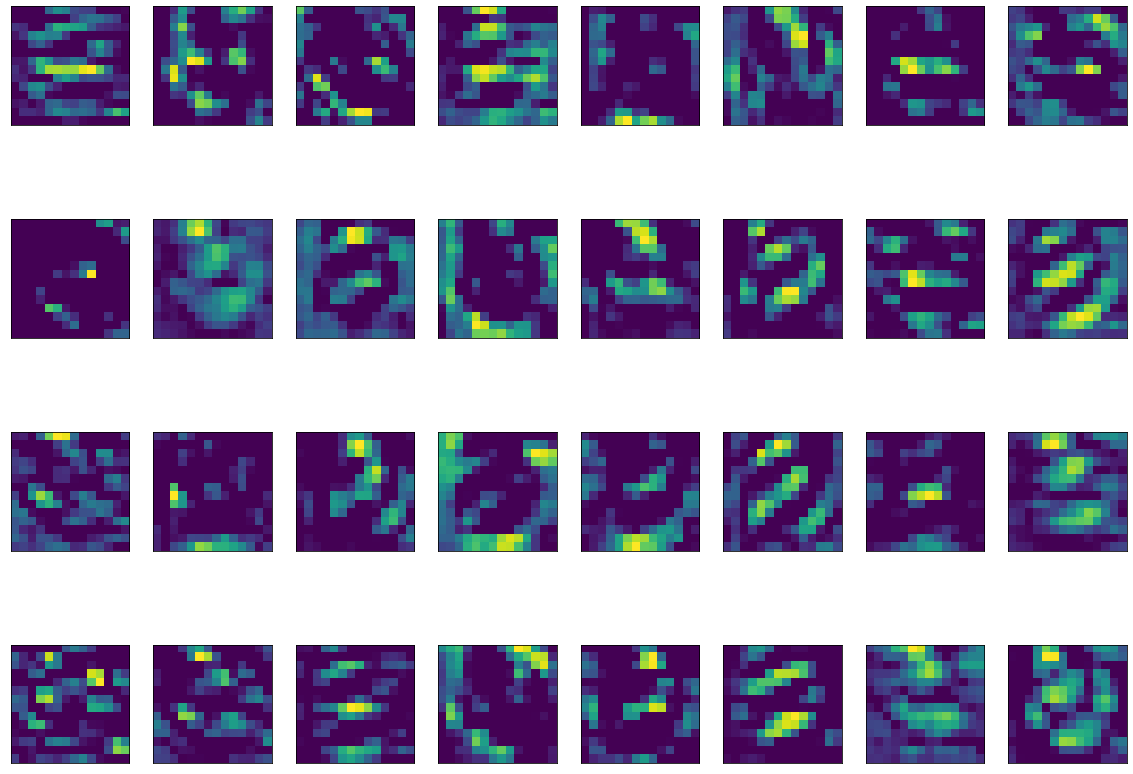

layer: Conv3_3 , feature map shape : (1, 14, 14, 64)
nrow : 8 , ncol : 8


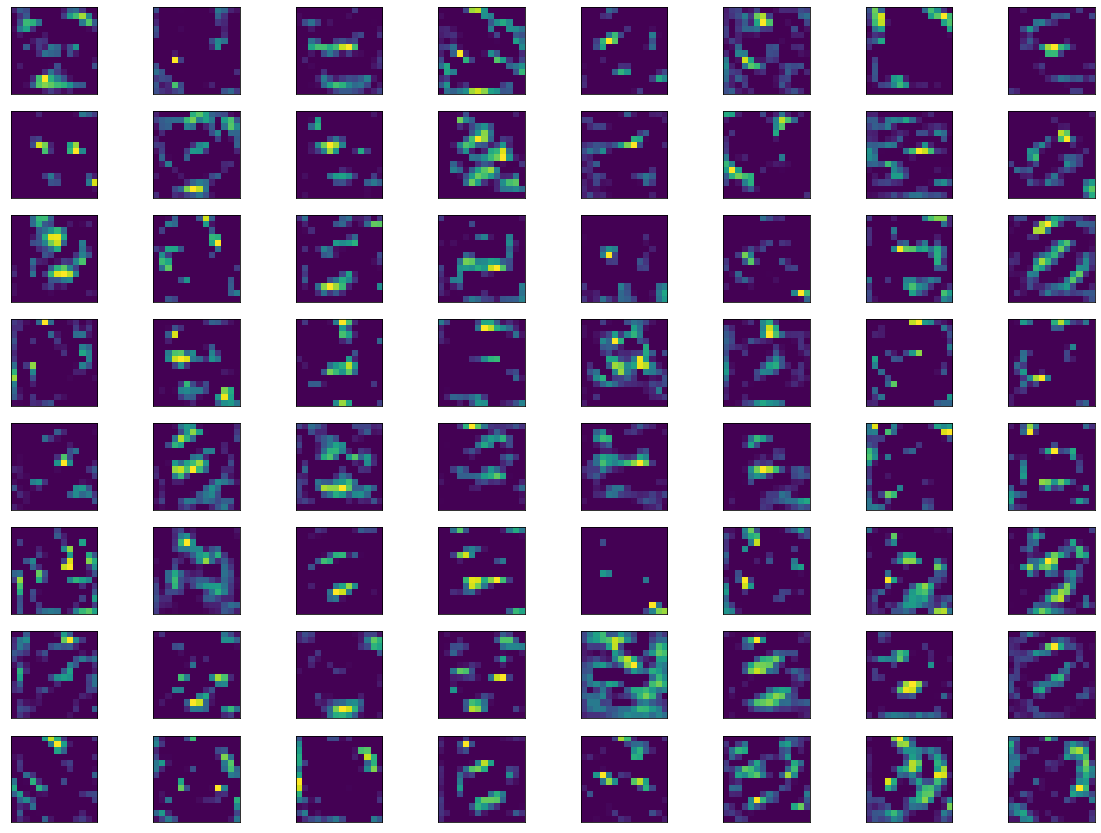

layer: Bnorm3 , feature map shape : (1, 14, 14, 64)
nrow : 8 , ncol : 8


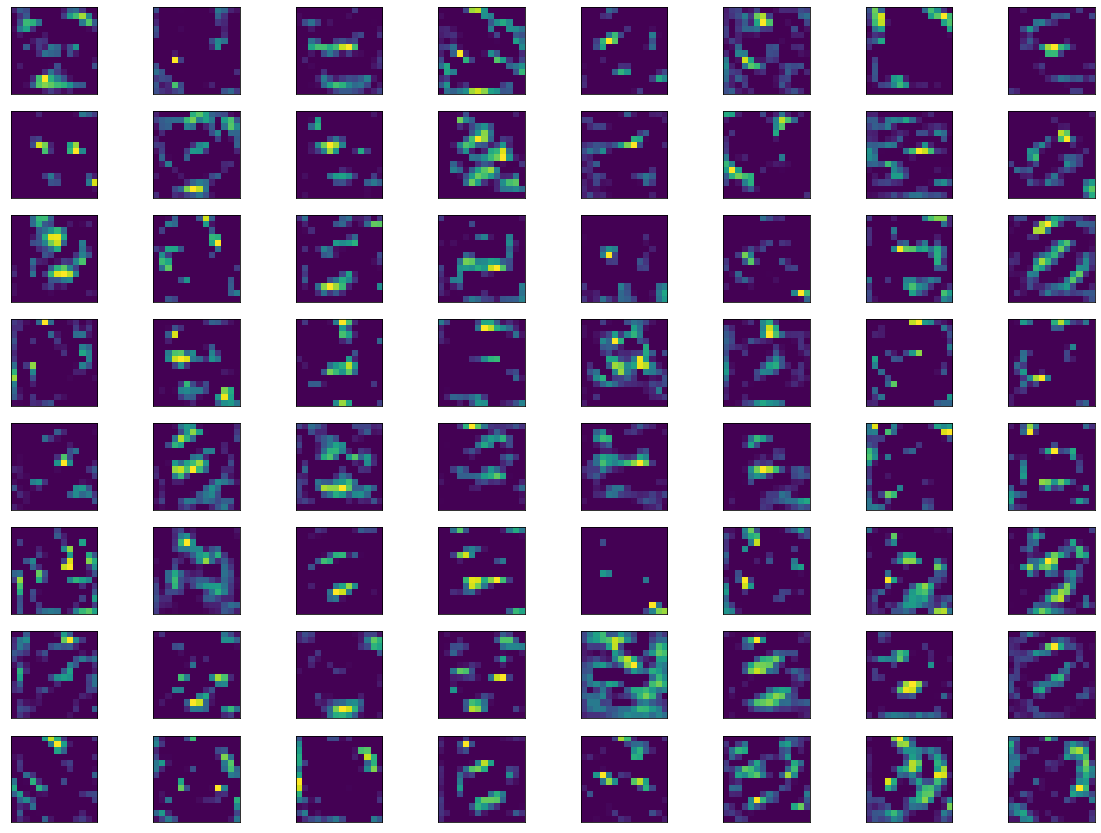

layer: Conv4_3 , feature map shape : (1, 14, 14, 64)
nrow : 8 , ncol : 8


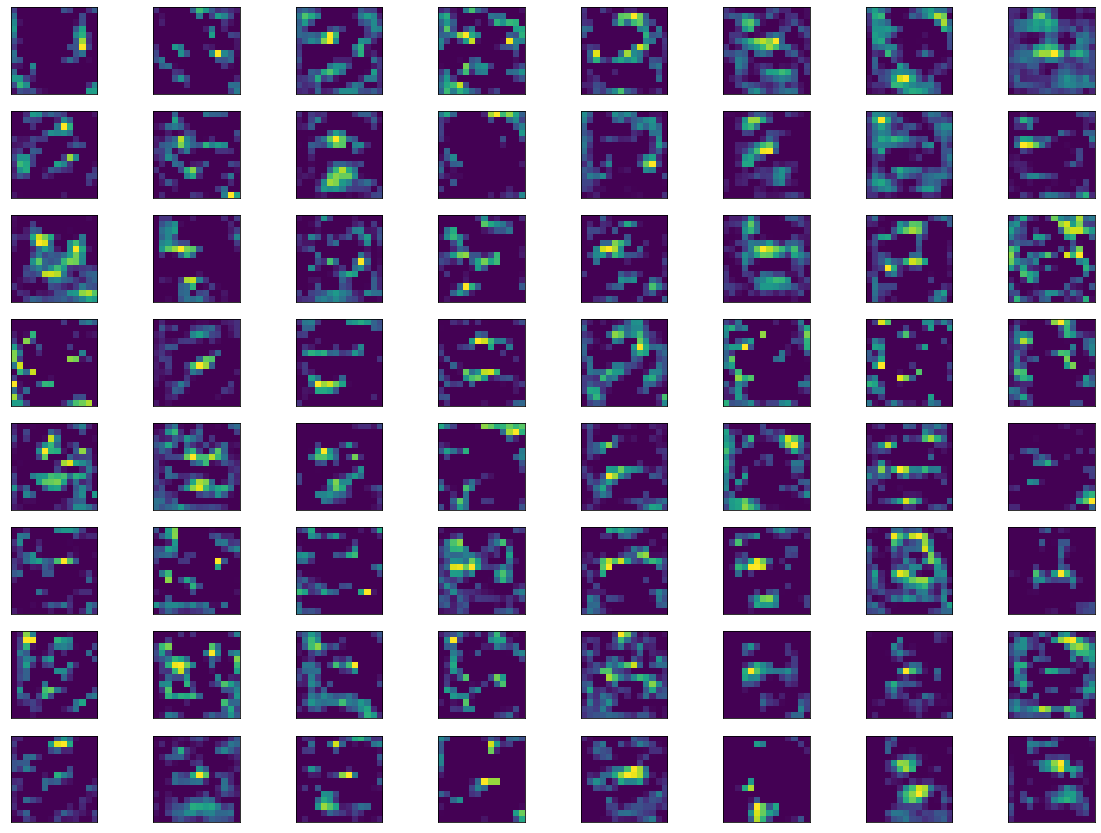

layer: Bnorm4 , feature map shape : (1, 14, 14, 64)
nrow : 8 , ncol : 8


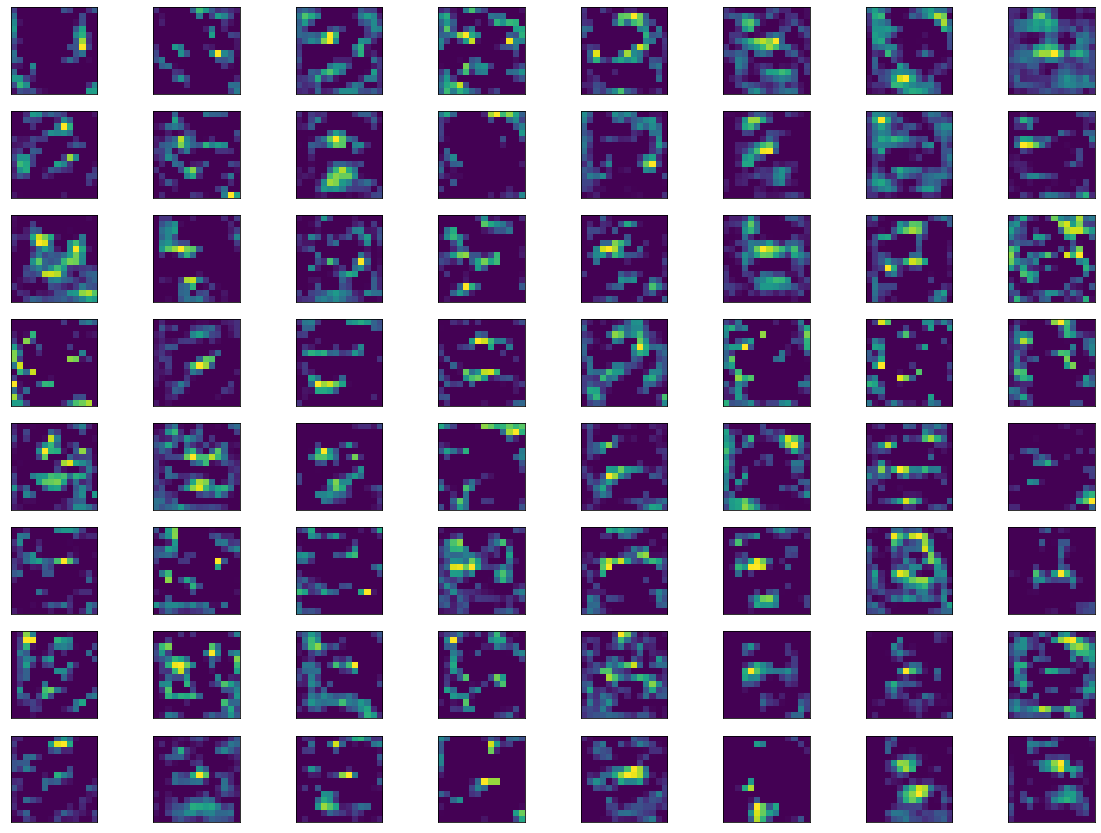

layer: Avgpool1 , feature map shape : (1, 7, 7, 64)
nrow : 8 , ncol : 8


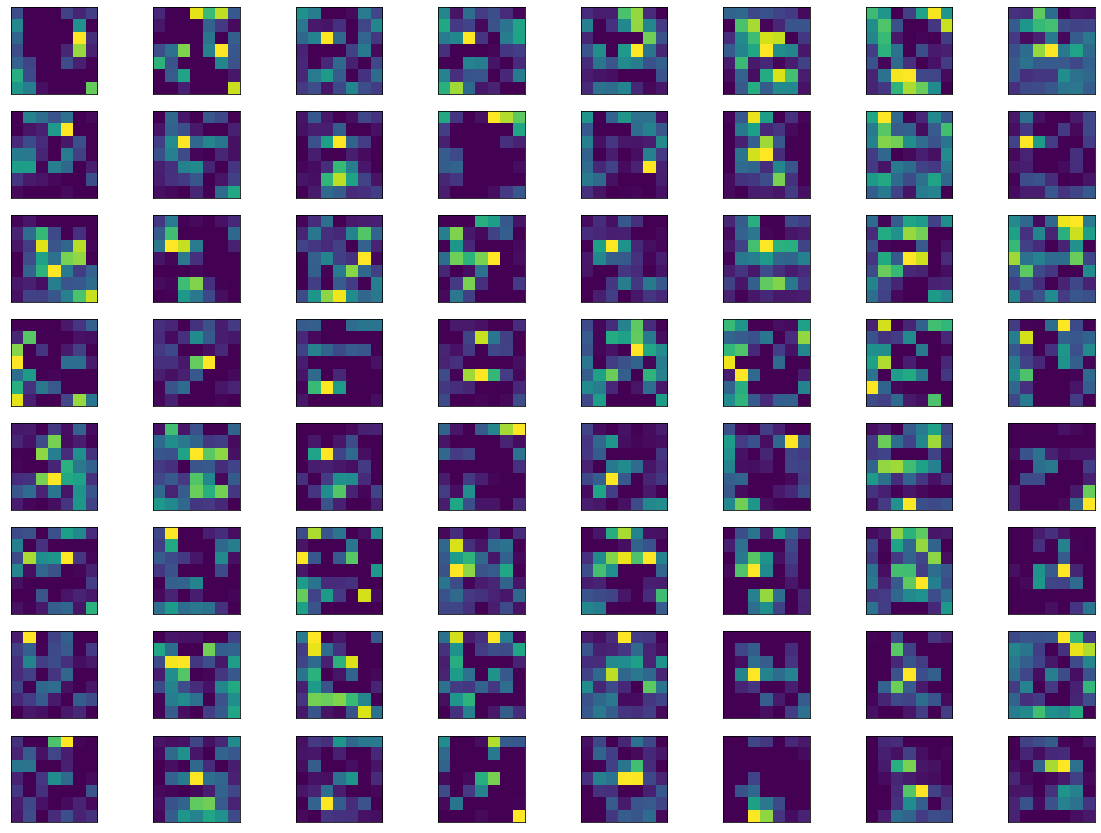

layer: Conv5_1 , feature map shape : (1, 7, 7, 128)
nrow : 16 , ncol : 8


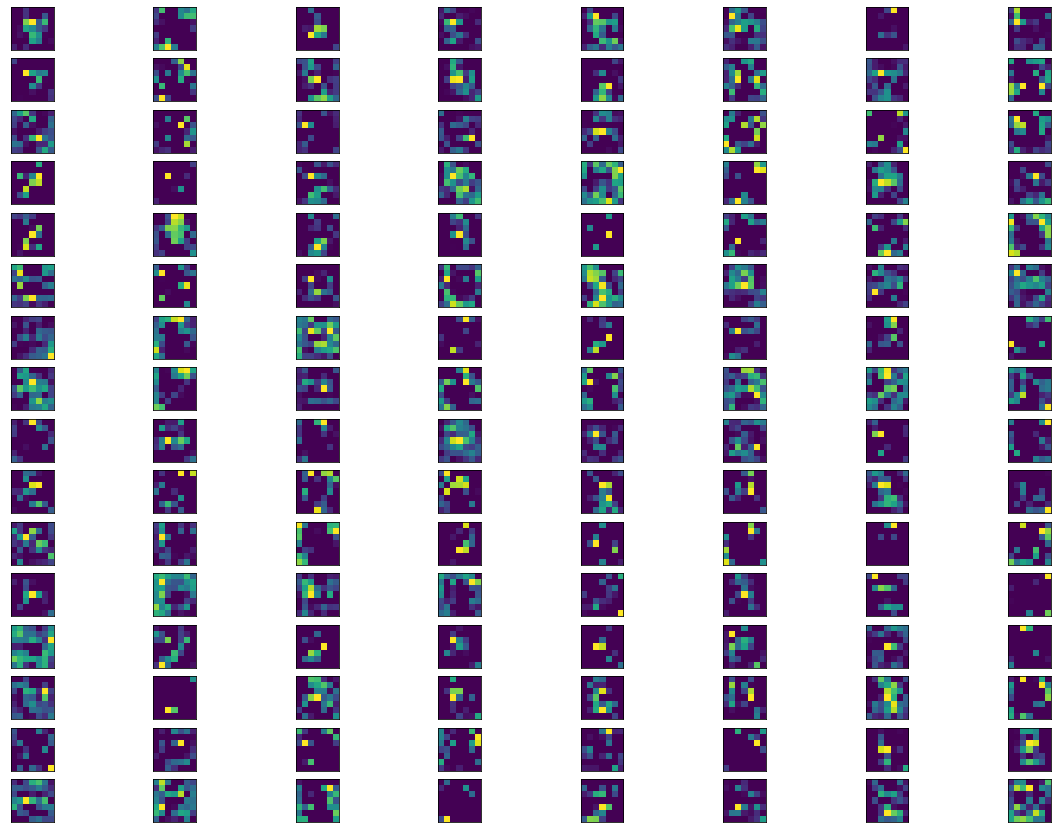

layer: Bnorm5 , feature map shape : (1, 7, 7, 128)
nrow : 16 , ncol : 8


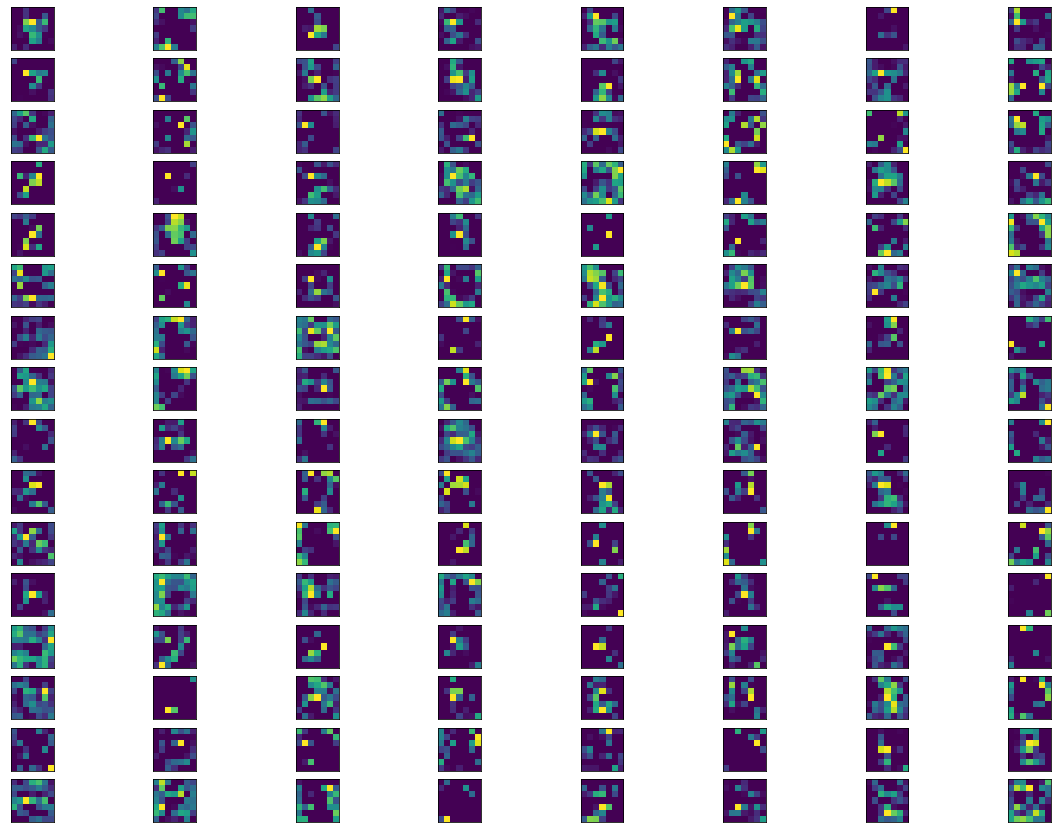

In [ ]:
for i in range(1,13):
  layer = Model(inputs= model.inputs,outputs=model.layers[i].output)
  featuremaps=layer.predict(trainx[100].reshape(1,32,32,3))
  print('layer: {} , feature map shape : {}'.format(model.layers[i].name,featuremaps.shape))
  nrow = int(featuremaps.shape[-1]/8)
  ncol = 8
  print('nrow : {} , ncol : {}'.format(nrow , ncol))
  plt.figure(figsize=(20,15))
  ix = 1
  for nr in range(nrow):
    for nc in range(ncol):
      ax = plt.subplot(nrow,ncol,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(featuremaps[0,:,:,ix-1])
      ix = ix+1
  plt.show()    

In [107]:
import cv2
trainimage = []
for i in range(34799):
  image = trainx[i]
  graypic = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  trainimage.append(graypic)
graytrain = np.array(trainimage)

validimage = []
for i in range(4410):
  image2 = validx[i]
  graypic2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
  validimage.append(graypic2)
grayvalid = np.array(validimage)
print('convert picture to gray')

convert picture to gray


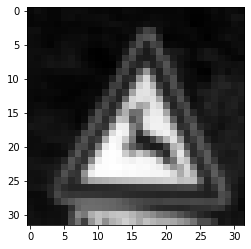

In [108]:
plt.imshow(graytrain[500],cmap='gray')

In [109]:
graytrain = graytrain.reshape(34799,32,32,1)
trianinggraydata = datagen.flow(graytrain,y=trainy,batch_size=batch_size)
grayvalid = grayvalid.reshape(4410,32,32,1)
validgraydata = datagen.flow(grayvalid,y=validy,batch_size=batch_size)

In [110]:
esgray = EarlyStopping(monitor='val_loss',mode='auto',verbose=1,patience=1)
checkpointergray = ModelCheckpoint(filepath="best_weights.hdf5",monitor='val_accuracy',verbose=1,save_best_only=True)

In [111]:
inputmodel=Input((graytrain.shape[1],graytrain.shape[2],graytrain.shape[3]),name='input_layer')

model1=Conv2D(32,(5,5),activation='relu',name='Conv1_5')(inputmodel)
model1=BatchNormalization(name='Bnorml')(model1)
model1=Conv2D(32,(5,5),activation='relu',padding='same',name='Conv2_5')(model1)
model1=BatchNormalization(name='Bnorm2')(model1)
model1=MaxPooling2D((2,2),name='Maxpool1')(model1)
model1=Conv2D(64,(3,3),activation='relu',padding='same',name='Conv3_3')(model1)
model1=BatchNormalization(name='Bnorm3')(model1)
model1=Conv2D(64,(3,3),activation='relu',padding='same',name='Conv4_3')(model1)
model1=BatchNormalization(name='Bnorm4')(model1)
model1=AveragePooling2D((2,2),name='Avgpool1')(model1)
model1=Conv2D(128,(1,1),activation='relu',padding='valid',name='Conv5_1')(model1)
model1=BatchNormalization(name='Bnorm5')(model1)

model1=Flatten(name='Flatten')(model1)

model1=Dense(units=32,activation='relu')(model1)
model=Dropout(rate=0.2)(model1)
model1=BatchNormalization()(model1)
model1=Dense(units=20,activation='relu')(model1)
model1=BatchNormalization()(model1)
model1=Dense(units=15,activation='relu')(model1)
model1=BatchNormalization()(model1)
output=Dense(units=43,activation='softmax',name='preds')(model1)

model2 = Model(inputs = [inputmodel],outputs=[output])
model2.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 1)]       0         
_________________________________________________________________
Conv1_5 (Conv2D)             (None, 28, 28, 32)        832       
_________________________________________________________________
Bnorml (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
Conv2_5 (Conv2D)             (None, 28, 28, 32)        25632     
_________________________________________________________________
Bnorm2 (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
Maxpool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
Conv3_3 (Conv2D)             (None, 14, 14, 64)      

In [112]:
sgd = SGD(learning_rate=0.02,momentum=0.9)
model2.compile(optimizer=sgd , loss='categorical_crossentropy',metrics=['accuracy'])
print('optimizer defined')

optimizer defined


In [113]:
history = model2.fit_generator(trianinggraydata,validation_data = validgraydata,
                              epochs=10,
                              verbose=1,
                              callbacks=[esgray,checkpointergray])

Epoch 1/10
136/136 [==============================] - ETA: 0s - loss: 2.8646 - accuracy: 0.2549
Epoch 00001: val_accuracy improved from -inf to 0.10068, saving model to best_weights.hdf5
136/136 [==============================] - 10s 72ms/step - loss: 2.8646 - accuracy: 0.2549 - val_loss: 3.5523 - val_accuracy: 0.1007
Epoch 2/10
136/136 [==============================] - ETA: 0s - loss: 1.2373 - accuracy: 0.6486
Epoch 00002: val_accuracy improved from 0.10068 to 0.55692, saving model to best_weights.hdf5
136/136 [==============================] - 10s 71ms/step - loss: 1.2373 - accuracy: 0.6486 - val_loss: 1.5381 - val_accuracy: 0.5569
Epoch 3/10
136/136 [==============================] - ETA: 0s - loss: 0.5025 - accuracy: 0.8630
Epoch 00003: val_accuracy improved from 0.55692 to 0.82200, saving model to best_weights.hdf5
136/136 [==============================] - 10s 71ms/step - loss: 0.5025 - accuracy: 0.8630 - val_loss: 0.6152 - val_accuracy: 0.8220
Epoch 4/10
136/136 [==============

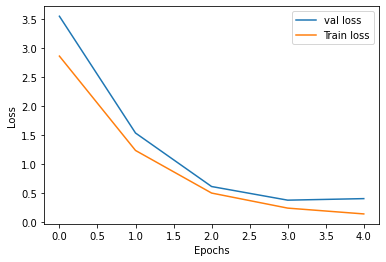

In [114]:
model2.save_weights("/gdrive/My Drive/weights6.h5")
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['val loss','Train loss'],loc = 'upper right')
plt.savefig('plot_loss.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper righr'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


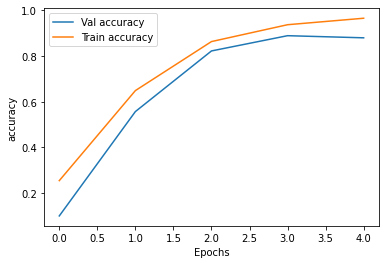

In [115]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'],loc='upper righr')
plt.savefig('plot_accuracy.png')
plt.show()

In [118]:
train2x = np.concatenate((trainx , trainx))
train4x = np.concatenate((train2x,train2x))
train2y = np.concatenate((trainy,trainy))
train4y = np.concatenate((train2y,train2y))
print('Data quadrupled')
print('X: '+str(train4x.shape) + ' Y: '+ str(train4y.shape))

Data quadrupled
X: (139196, 32, 32, 3) Y: (139196, 43)


In [119]:
valid2x = np.concatenate((validx , validx))
valid4x = np.concatenate((valid2x,valid2x))
valid2y = np.concatenate((validy,validy))
valid4y = np.concatenate((valid2y,valid2y))

In [120]:
trainingdata4 = datagen.flow(train4x,y=train4y,batch_size=batch_size)
validdata4 = datagen.flow(valid4x,y=valid4y,batch_size=batch_size)
print('quadrupled data ready for cnn')

quadrupled data ready for cnn


In [121]:
inputmodel=Input((train4x.shape[1],train4x.shape[2],train4x.shape[3]),name='input_layer')

model1=Conv2D(32,(5,5),activation='relu',name='Conv1_5')(inputmodel)
model1=BatchNormalization(name='Bnorml')(model1)
model1=Conv2D(32,(5,5),activation='relu',padding='same',name='Conv2_5')(model1)
model1=BatchNormalization(name='Bnorm2')(model1)
model1=MaxPooling2D((2,2),name='Maxpool1')(model1)
model1=Conv2D(64,(3,3),activation='relu',padding='same',name='Conv3_3')(model1)
model1=BatchNormalization(name='Bnorm3')(model1)
model1=Conv2D(64,(3,3),activation='relu',padding='same',name='Conv4_3')(model1)
model1=BatchNormalization(name='Bnorm4')(model1)
model1=AveragePooling2D((2,2),name='Avgpool1')(model1)
model1=Conv2D(128,(1,1),activation='relu',padding='valid',name='Conv5_1')(model1)
model1=BatchNormalization(name='Bnorm5')(model1)

model1=Flatten(name='Flatten')(model1)

model1=Dense(units=32,activation='relu')(model1)
model=Dropout(rate=0.2)(model1)
model1=BatchNormalization()(model1)
model1=Dense(units=20,activation='relu')(model1)
model1=BatchNormalization()(model1)
model1=Dense(units=15,activation='relu')(model1)
model1=BatchNormalization()(model1)
output=Dense(units=43,activation='softmax',name='preds')(model1)

model3 = Model(inputs = [inputmodel],outputs=[output])

In [122]:
sgd = SGD(learning_rate=0.01,momentum=0.9)
model3.compile(optimizer=sgd , loss='categorical_crossentropy',metrics=['accuracy'])

history = model3.fit_generator(trainingdata4,validation_data = validdata4,
                              epochs=10,
                              verbose=1,
                              callbacks=[esgray,checkpointergray])

Epoch 1/10
544/544 [==============================] - ETA: 0s - loss: 1.2661 - accuracy: 0.6609
Epoch 00001: val_accuracy did not improve from 0.88866
544/544 [==============================] - 65s 119ms/step - loss: 1.2661 - accuracy: 0.6609 - val_loss: 0.7226 - val_accuracy: 0.7926
Epoch 2/10
544/544 [==============================] - ETA: 0s - loss: 0.1326 - accuracy: 0.9719
Epoch 00002: val_accuracy improved from 0.88866 to 0.91145, saving model to best_weights.hdf5
544/544 [==============================] - 65s 119ms/step - loss: 0.1326 - accuracy: 0.9719 - val_loss: 0.3467 - val_accuracy: 0.9115
Epoch 3/10
544/544 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9912
Epoch 00003: val_accuracy improved from 0.91145 to 0.92925, saving model to best_weights.hdf5
544/544 [==============================] - 64s 118ms/step - loss: 0.0442 - accuracy: 0.9912 - val_loss: 0.3056 - val_accuracy: 0.9293
Epoch 4/10
544/544 [==============================] - ETA: 0s - los

In [123]:
model2.save_weights("/gdrive/My Drive/weights7.h5")

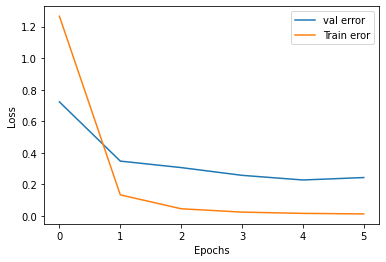

In [124]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['val error','Train eror'],loc = 'upper right')
plt.savefig('plot_error.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper righr'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


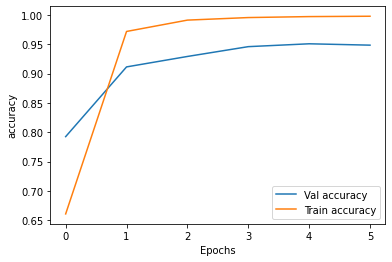

In [125]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'],loc='upper righr')
plt.savefig('plot_accuracy.png')
plt.show()

In [127]:
predicty = model3.predict(testx)
predicty = np.argmax(predicty,axis=1)
temptesty = df_test['labels']
falsenumber = 0
for i in range(len(predicty)):
  if(predicty[i] != temptesty[i]):
    falsenumber += 1
print (str(falsenumber) + ' prediction was false')
print('for quadrupled data is better')

514 prediction was false
for quadrupled data is better
